In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from CD import * #Funcion Propia T_func(q1,q2,q3,L1,L2,L3,L4,L5)=(x,y,z)

from scipy.fft import fftfreq
from scipy.fft import fft

from matplotlib.ticker import MultipleLocator

In [2]:
def Inv(R,L):
    x,y,z=R
    L1,L2,L3,L4,L5=L
    cosq3=(x**2+y**2+(z-L1)**2-L3**2-L5**2)/(2*L3*L5)
    cosb=(L3+L5*cosq3)/np.sqrt(x**2+y**2+(z-L1)**2)
  
    q1=[np.arctan2(-x,y),np.arctan2(-x,y)]

    q3=[+np.arctan2(np.sqrt(1-cosq3**2),cosq3),\
        -np.arctan2(np.sqrt(1-cosq3**2),cosq3)]

    q2=[np.arctan2((z-L1),np.sqrt(x**2+y**2))-np.arctan2(np.sqrt(1-cosb**2),cosb)-np.pi/2,\
        np.arctan2((z-L1),np.sqrt(x**2+y**2))+np.arctan2(np.sqrt(1-cosb**2),cosb)-np.pi/2]

    return[[q1[0],q2[0],q3[0]],[q1[1],q2[1],q3[1]]]

In [3]:
def PosInt(Q,L):
    q1,q2,q3=Q
    L1,L2,L3,L4,L5=L

    x0=y0=0
    z0=0

    x1=y1=0
    z1=L1

    x2=L2*(np.cos(q1))
    y2=L2*np.sin(q1)
    z2=L1

    x3=x2+L3*np.sin(q2)*np.sin(q1)
    y3=y2-L3*np.sin(q2)*np.cos(q1)
    z3=z2+L3*np.cos(q2)

    x4=x3-L4*np.cos(q1)
    y4=y3-L4*np.sin(q1)
    z4=z3

    x5=x4+L5*np.sin(q2+q3)*np.sin(q1)
    y5=y4-L5*np.sin(q2+q3)*np.cos(q1)
    z5=z4+L5*np.cos(q2+q3)
    return[[x0,x1,x2,x3,x4,x5],[y0,y1,y2,y3,y4,y5],[z0,z1,z2,z3,z4,z5]]

In [37]:
N=36000
nciclos=10
t_p=np.linspace(0,nciclos*2*np.pi,N)

# L=[1,0.3,1,0.3,1]

# ROBOT 1
# L=[0.3,0.3,1.2,0.3,1.2]

# ROBOT 2 y 3
L=[0.4,0.2,1.2,0.2,1.2]

# r=0.3
# xt=np.cos(t_p)*np.sqrt(1-r**2*(np.cos(10*t_p))**2)
# yt=np.sin(t_p)*np.sqrt(1-r**2*(np.cos(10*t_p))**2)
# zt=1+r*np.cos(10*t_p)

# r=5
# xt=1.8*np.sin(t_p/(2*r))*np.cos(t_p) 
# yt=1.8*np.sin(t_p/(2*r))*np.sin(t_p)
# zt=1+1.8*np.cos(t_p/(2*r))

freq=1/(2*np.pi)

A=0.6*np.cos(t_p*freq*2*np.pi)+0.8
r=0.3
xt=A*np.cos(t_p*freq*2*np.pi)*np.sqrt(1-r**2*(np.cos(10*t_p*freq*2*np.pi))**2)
yt=A*np.sin(t_p*freq*2*np.pi)*np.sqrt(1-r**2*(np.cos(10*t_p*freq*2*np.pi))**2)
zt=A*(1+r*np.cos(10*t_p*freq*2*np.pi))

R_0=list(zip(xt,yt,zt))
Finv=[Inv(R_pos,L)[1] for R_pos in R_0]

## Mini Analisis de Fourier

In [38]:
qq1=[i[0] for i in Finv]
qq2=[i[1] for i in Finv]
qq3=[i[2] for i in Finv]


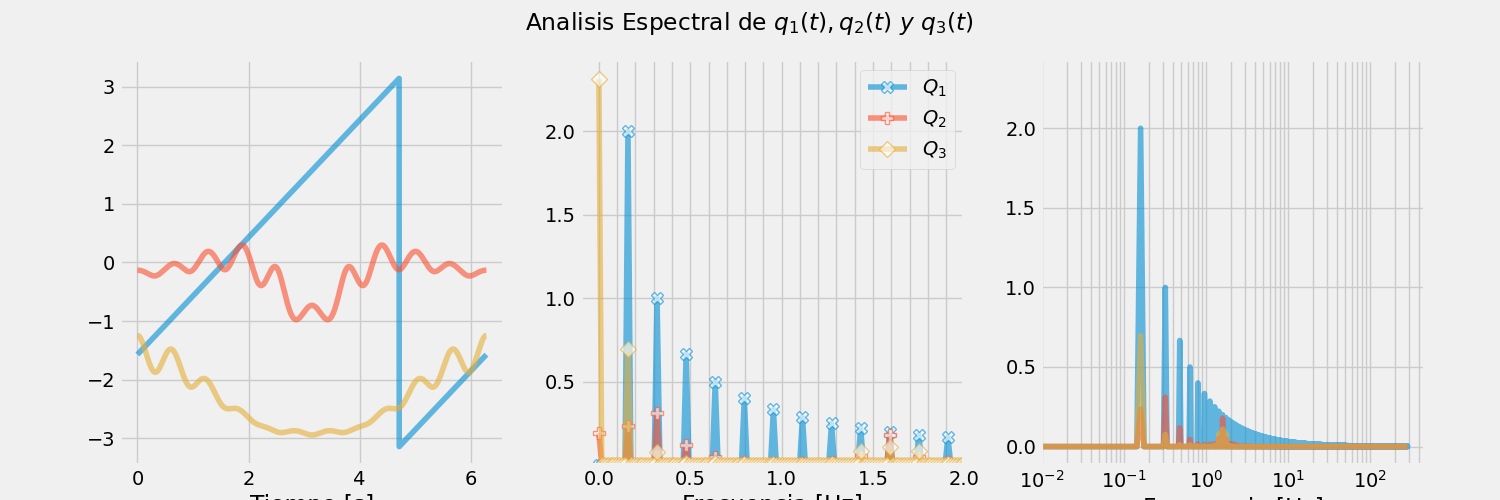

In [40]:
plt.style.use('fivethirtyeight')

f=fftfreq(len(t_p),np.diff(t_p)[0])
qq1_FFT=fft(qq1)
qq2_FFT=fft(qq2)
qq3_FFT=fft(qq3)

q1_y=np.abs(qq1_FFT[:N//2]*2/N)
q1_y[0]=q1_y[0]/2

q2_y=np.abs(qq2_FFT[:N//2]*2/N)
q2_y[0]=q2_y[0]/2

q3_y=np.abs(qq3_FFT[:N//2]*2/N)
q3_y[0]=q3_y[0]/2

fp=f[:N//2]

min_amplitude_f=1e-6
#np.min([np.abs(qq2_FFT[:N//2]),np.abs(qq3_FFT[:N//2])])

# plt.plot(qq1)
# plt.plot(qq2)
# plt.plot(qq3)
fig,ax=plt.subplots(1,3,figsize=(15,5))
# ax[1].grid()

# seccion de solo un ciclo
i_ciclo1=int(len(t_p)/nciclos)

ax[0].set_xlabel('Tiempo [s]')
ax[0].plot(t_p[:i_ciclo1],qq1[:i_ciclo1], alpha=.6,label=r'$Q_1$')
ax[0].plot(t_p[:i_ciclo1],qq2[:i_ciclo1], alpha=.6,label=r'$Q_2$')
ax[0].plot(t_p[:i_ciclo1],qq3[:i_ciclo1], alpha=.6,label=r'$Q_3$')

#

ax[1].set_xlabel('Frecuencia [Hz]')
ax[1].plot(fp,q1_y, alpha=.6,marker='X',mew=1,mfc='w',markersize=8,label=r'$Q_1$')
ax[1].plot(fp,q2_y, alpha=.6,marker='P',mew=1,mfc='w',markersize=8,label=r'$Q_2$')
ax[1].plot(fp,q3_y, alpha=.6,marker='D',mew=1,mfc='w',markersize=8,label=r'$Q_3$')

ax[2].set_xlabel('Frecuencia [Hz]')
ax[2].semilogx(fp,q1_y, alpha=.6,mew=1,mfc='w',markersize=8,label=r'$Q_1$')
ax[2].semilogx(fp,q2_y, alpha=.6,mew=1,mfc='w',markersize=8,label=r'$Q_2$')
ax[2].semilogx(fp,q3_y, alpha=.6,mew=1,mfc='w',markersize=8,label=r'$Q_3$')

ax[2].xaxis.grid(True, which='both')


minorLocatorx = MultipleLocator(0.1)
ax[1].xaxis.set_minor_locator(minorLocatorx)
# ax[1].yaxis.set_minor_locator(minorLocatorx)



ax[1].set_ylim(bottom=min_amplitude_f)
ax[1].set_xlim((-0.1,2))

ax[1].xaxis.grid(True, which='both')


fig.suptitle('Analisis Espectral de $q_1(t) , q_2(t) \  y \  q_3(t)$')
ax[1].legend()
fig.savefig('.\Contido Grafico\A Espectral aa2.png',bbox_inches='tight',transparent=True,dpi=200)

In [16]:
figa=go.Figure()    
for i in Finv:
    figa.add_trace(go.Scatter3d(x=PosInt(i,L)[0], y=PosInt(i,L)[1], z=PosInt(i,L)[2],marker=dict(
        size=4,
        colorscale='Viridis',
    ),))

figa.add_trace(go.Scatter3d(x=xt, y=yt, z=zt,marker=dict(
        size=8,
        colorscale='Viridis',
    )))



## Animación Del Robot Trazando la misma Senda

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
X1=[PosInt(i,L)[0] for i in Finv]
Y1=[PosInt(i,L)[1] for i in Finv]
Z1=[PosInt(i,L)[2] for i in Finv]

In [ ]:
len(X1)

360

In [ ]:
# def animate(i):
#     ln1.set_data(Y1[i],Z1[i])

# fig, ax=plt.subplots(1,1,figsize=(16,16))
# ln1, =ax.plot([],[],lw=3,markersize=8)
# ln2, =ax.plot(yt,zt,'g--',lw=2,markersize=4)

# ax.set_ylim(-1.2,3.2)
# ax.set_xlim(-2.2,2.2)
# ax.set_aspect('equal')

# fig.suptitle('Cosillas',fontsize=40)

# ani= animation.FuncAnimation(fig,animate,frames=100,interval=10)
# ani.save('Cosillas.gif',writer='pillow',fps=50)

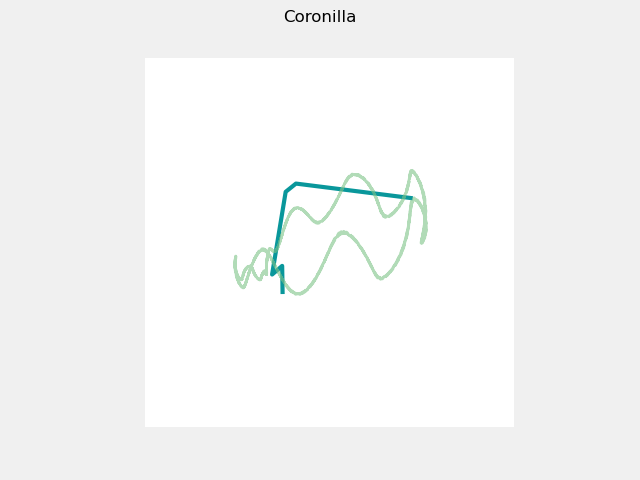

In [ ]:
%matplotlib widget
# plt.style.use('fivethirtyeight')
# plt.style.use('bmh')
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
# plt.style.use('ggplot')

proba1 = plt.figure()
ax2 = proba1.add_subplot(projection='3d')

ax2.set_axis_off()

proba1.set_facecolor('white')
ax2.set_facecolor('white')
ax2.set_alpha(0)
proba1.set_alpha(0)


def update(i):
    line.set_data(X1[i],Y1[i])
    line.set_3d_properties(Z1[i])

line, = ax2.plot([],[],[],'#09979b',lw=3,markersize=8)
line2, =ax2.plot(xt,yt,zt,'#7ec488',alpha=0.6,linestyle='dashed',lw=2,markersize=4)

# Setting the ax2es properties
ax2.set_xlim3d([-0.2+min(xt), max(xt)+0.2])
ax2.set_xlabel('X')

ax2.set_ylim3d([-0.2+min(yt), max(yt)+0.2])
ax2.set_ylabel('Y')

ax2.set_zlim3d([0, max(zt)+0.2])
ax2.set_zlabel('Z')

proba1.suptitle('Coronilla')

ani = animation.FuncAnimation(proba1, update ,frames=len(X1),interval=20, blit=True)
ani.save('Cosillas.gif',writer='pillow',fps=20)
plt.show()